<a href="https://colab.research.google.com/github/R3gm/Colab-resources/blob/main/Image_Super_Resolution_latent_upscaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://huggingface.co/stabilityai/sd-x2-latent-upscaler

https://huggingface.co/stabilityai/stable-diffusion-x4-upscaler



In [1]:
!pip install -q diffusers transformers accelerate bitsandbytes xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 6.3 MB/s eta 0:00:00


In [1]:
#@title Setup
from diffusers import StableDiffusionLatentUpscalePipeline, StableDiffusionPipeline, StableDiffusionUpscalePipeline
from google.colab import files
import torch
import requests
from PIL import Image
from io import BytesIO
import gc
import matplotlib.pyplot as plt

Saving cat_5-.jpg to cat_5- (2).jpg
Original image


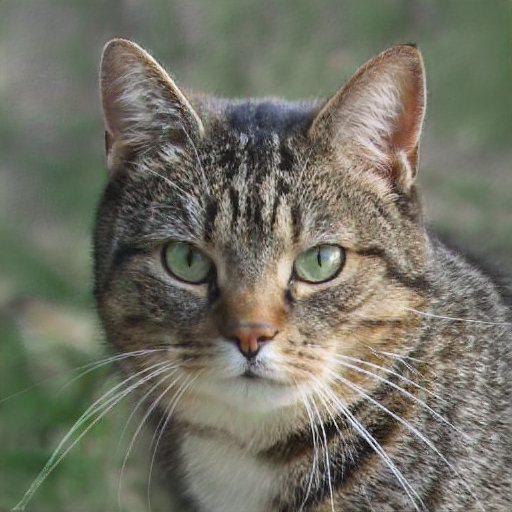

In [4]:
#@title Upload an image

# File
uploaded = files.upload()
image_path = next(iter(uploaded))
image_content = uploaded[image_path]

# Preproc... and show
image = Image.open(BytesIO(image_content)).convert("RGB")
#image = image.resize((128, 128))
print('Original image')
image.show()

  0%|          | 0/75 [00:00<?, ?it/s]

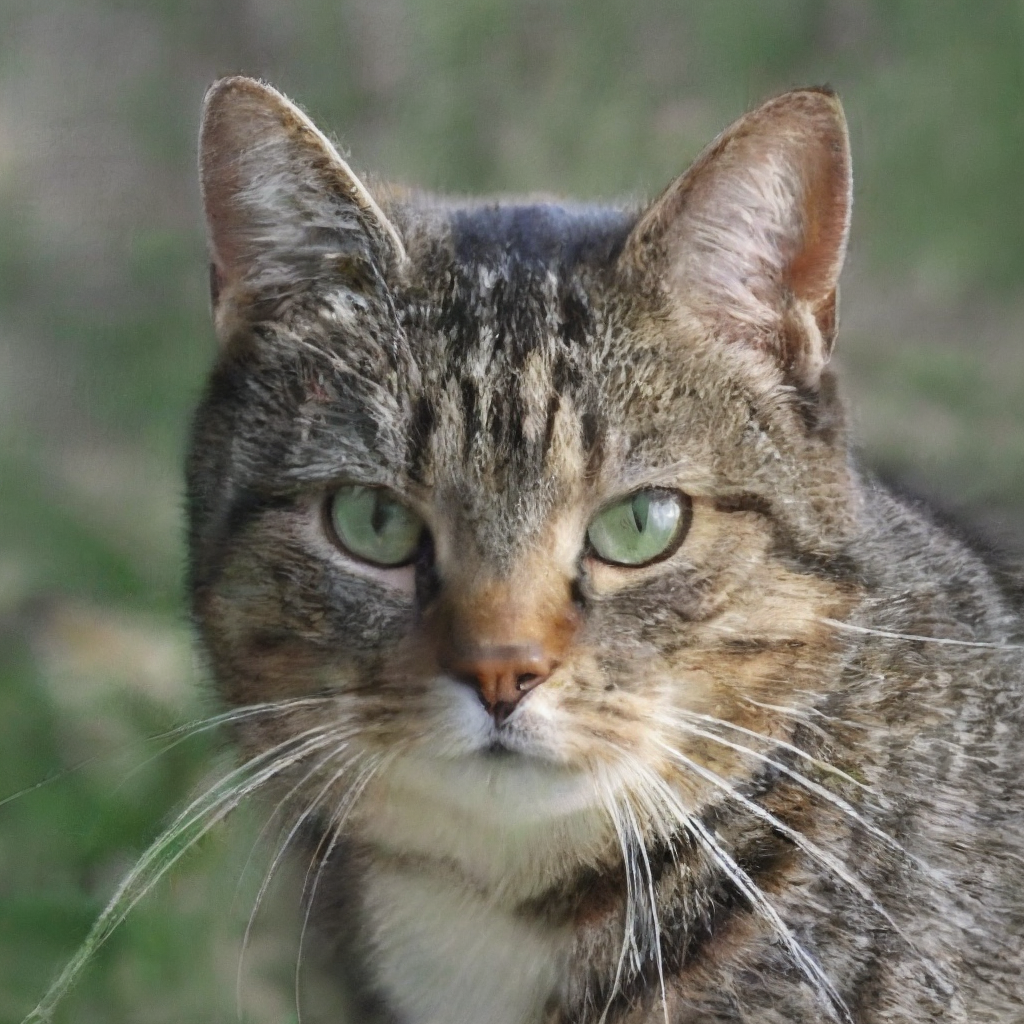

26

In [7]:
# Conf
MODEL_ID = "stabilityai/sd-x2-latent-upscaler" #@param ["stabilityai/stable-diffusion-x4-upscaler", "stabilityai/sd-x2-latent-upscaler"] 
PROMPT = "" #@param {type:"string"}

NUM_INFERENCE_STEPS = 20 #@param {type:"integer"}
GUIDANCE_SCALE = 0 #@param {type:"integer"}
#@markdown
ENABLE_MANUAL_SEED = False #@param {type:'boolean'}
MANUAL_SEED = 33 #@param {type:"integer"}
generator = torch.manual_seed(MANUAL_SEED) if ENABLE_MANUAL_SEED else None


# Select model conf
if MODEL_ID == "stabilityai/stable-diffusion-x4-upscaler":
  pipeline = StableDiffusionUpscalePipeline.from_pretrained(MODEL_ID, torch_dtype=torch.float16).to("cuda")
  image = image.resize((128, 128)) # memory
  
else:
  pipeline = StableDiffusionLatentUpscalePipeline.from_pretrained(MODEL_ID, torch_dtype=torch.float16).to("cuda")

# Upscaler
upscaled_image = pipeline(
  prompt=PROMPT,
  image=image,
  num_inference_steps=NUM_INFERENCE_STEPS,
  guidance_scale=GUIDANCE_SCALE,
  generator=generator, 
).images[0]

upscaled_image.show()
upscaled_image.save("upscale.png")

torch.cuda.empty_cache()
gc.collect()

In [ ]:
#@title Download result

files.download('upscale.png')

In [ ]:
#@title Compare the results
#  Compare
fig, axs = plt.subplots(1, 2)

axs[0].imshow(image)
axs[0].axis('off')

axs[1].imshow(upscaled_image)
axs[1].axis('off')

plt.tight_layout()
plt.show()

In [74]:
image.size + (len(image.getbands()),)

(512, 512, 3)

In [75]:
upscaled_image.size + (len(upscaled_image.getbands()),)

(1024, 1024, 3)